In [1]:
# Download and the MNIST dataset
from urllib.request import urlretrieve
import os


def download_data(dir, file_name, url):
    print('Downloading from:', url+file_name)
    filepath, h = urlretrieve(url+file_name, os.path.join(dir, file_name))
    statinfo = os.stat(filepath)
    print('Successfully downloaded', file_name, statinfo.st_size, 'bytes.')

data_dir = './MNIST'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
data_keys = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
for key in data_keys:
    if os.path.isfile(os.path.join(data_dir, key)):
        print('File', key, 'already exist.')
    else:
        download_data(data_dir, key, SOURCE_URL)
print('Downloading finished')

File train-images-idx3-ubyte.gz already exist.
File train-labels-idx1-ubyte.gz already exist.
File t10k-images-idx3-ubyte.gz already exist.
File t10k-labels-idx1-ubyte.gz already exist.


In [2]:
# Load and format the MNIST dataset
import gzip
import struct
import numpy as np

num_train_samples = 60000

with gzip.open('./MNIST/train-images-idx3-ubyte.gz') as gz:
    n = struct.unpack('I', gz.read(4))
    # Read magic number.
    if n[0] != 0x3080000:
        raise Exception('Invalid file: unexpected magic number.')
    # Read number of entries.
    n = struct.unpack('>I', gz.read(4))[0]
    if n != num_train_samples:
        raise Exception('Invalid file: expected {0} entries.'.format(num_train_samples))
    crow = struct.unpack('>I', gz.read(4))[0]
    ccol = struct.unpack('>I', gz.read(4))[0]
    if crow != 28 or ccol != 28:
        raise Exception('Invalid file: expected 28 rows/cols per image.')
    # Read image.
    # Format into 60000*784 array
    train_image = np.frombuffer(gz.read(num_train_samples * crow * ccol), dtype = np.uint8)
    train_image = train_image.reshape((num_train_samples, crow*ccol))
    
with gzip.open('./MNIST/train-labels-idx1-ubyte.gz') as gz:
    n = struct.unpack('I', gz.read(4))
    # Read magic number.
    if n[0] != 0x1080000:
        raise Exception('Invalid file: unexpected magic number.')
    # Read number of entries.
    n = struct.unpack('>I', gz.read(4))
    if n[0] != num_train_samples:
        raise Exception('Invalid file: expected {0} rows.'.format(num_train_samples))
    # Read labels.
    train_labels = np.frombuffer(gz.read(num_train_samples), dtype = np.uint8)

Image Label: 7


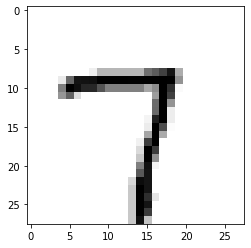

In [3]:
# Display an image from the dataset
import matplotlib.pyplot as plt
sample_number = 4396
plt.imshow(train_image[sample_number].reshape(28, 28), cmap="gray_r")
print('Image Label:', train_labels[sample_number])

In [4]:
# SGD algorithm
def SGD(W, X, y_oh, B, N, ITR, lr):
    acc_W = np.zeros(ITR)
    loss = np.zeros(ITR)
    for iteration in range(ITR):
        G = 0
        # Create a new batch by randomly choice of dataset
        batch_idx = np.random.randint(0, N, size=B)
        X_batch = X[batch_idx]
        y_batch = y_oh[batch_idx]

        # Calculate gradient
        G += np.dot(X_batch.T, (np.dot(X_batch, W.T) - y_batch))
        G = G/B
        
        # Calculate loss
        loss[iteration] = np.sum(np.square(np.dot(X_batch, W.T) - y_batch))
        
        # Update W
        W = W - lr * G.T
        
        # Calculate accuracy of current W
        acc_W[iteration] = acc(W, X[50000:60000,],y_oh[50000:60000,])
    return W, loss, acc_W

# Accuracy update function
def acc(W, X, y):
    cor_W = 0
    for i in range(10000):
        y_hat = np.argmax(np.dot(W, X[i]))
        if( y_hat == np.argmax(y[i])):
            cor_W += 1
    return cor_W/10000


# Initialize parameters
W0 = np.zeros((10, 784))

# Map labels into on-hot form
y_oh = np.zeros((60000, 10))
for i in range(60000):
    y_oh[i,train_labels[i]] = 1

# A test run on the SGD function
# ITR = 100
# lr = 2e-7
# W_Final, loss, acc_W = SGD(W0, train_image, y_oh, 1000, 50000, ITR, lr)

When batch size=11, t=3000, learning rate=1e-7, training finished in 146.31994676589966 second(s)
Final accuracy: 84.8 
Final loss: 0.5438889325785021


Text(0, 0.5, 'loss')

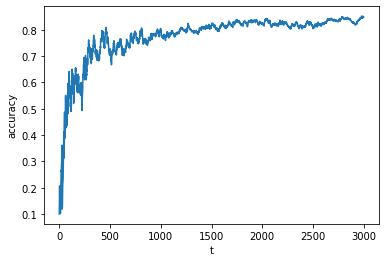

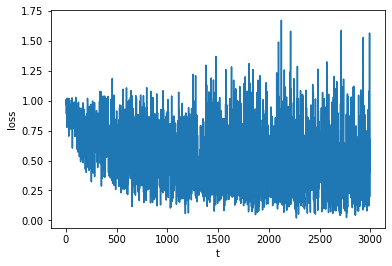

In [5]:
import time


# The role of batch size


# When B=1
B = 1
N = 50000
ITR = 3000
lr = 1e-8
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When batch size=11, t=3000, learning rate=1e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When batch size=10, t=1000, learning rate=2e-7, training finished in 47.2542827129364 second(s)
Final accuracy: 86.22 
Final loss: 5.257589101175465


Text(0, 0.5, 'loss')

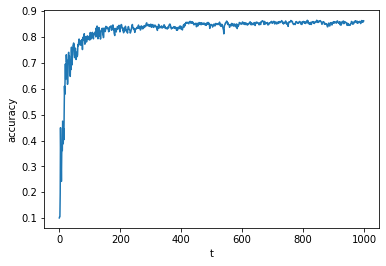

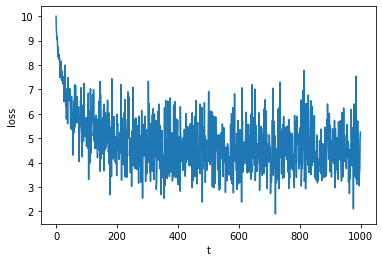

In [6]:
# When B = 10
B = 10
N = 50000
ITR = 1000
lr = 1e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When batch size=10, t=1000, learning rate=2e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When batch size=100, t=1000, learning rate=2e-7, training finished in 25.356192350387573 second(s)
Final accuracy: 85.83 
Final loss: 46.08480017995304


Text(0, 0.5, 'loss')

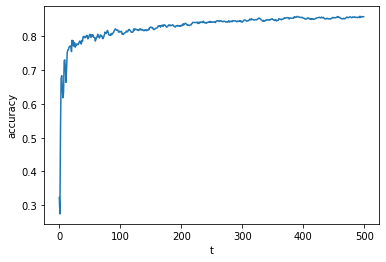

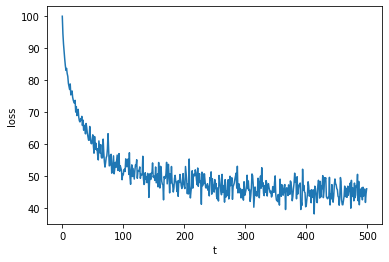

In [7]:
# When B =100
B = 100
N = 50000
ITR = 500
lr = 1e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When batch size=100, t=1000, learning rate=2e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When batch size=10, t=1000, learning rate=2e-7, training finished in 25.3657124042511 second(s)
Final accuracy: 86.25 
Final loss: 417.121521820672


Text(0, 0.5, 'loss')

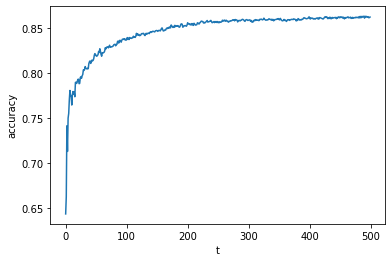

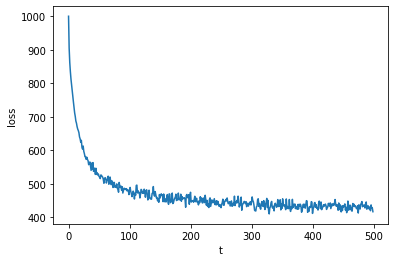

In [8]:
# When B =1000
B = 1000
N = 50000
ITR = 500
lr = 2e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When batch size=10, t=1000, learning rate=2e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When dataset size=100, t=100, learning rate=1e-7, training finished in 14.681530475616455 second(s)
Final accuracy: 68.58 
Final loss: 18.974593262966017


Text(0, 0.5, 'loss')

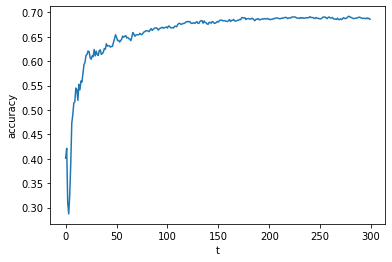

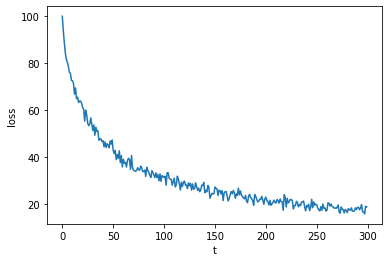

In [9]:
# The role of training dataset size

# Fix batch size B = 100
B = 100

# When N = 100
N = 100
ITR = 300
lr = 1e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When dataset size=100, t=100, learning rate=1e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When dataset size=500, t=1000, learning rate=1e-7, training finished in 47.767220973968506 second(s)
Final accuracy: 79.93 
Final loss: 31.397224699172817


Text(0, 0.5, 'loss')

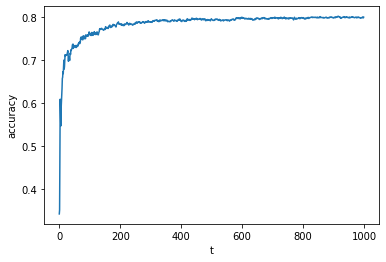

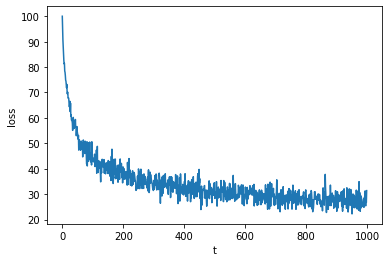

In [10]:
# When N = 500
N = 500
ITR = 1000
lr = 1e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When dataset size=500, t=1000, learning rate=1e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When datasize size=10, t=500, learning rate=2e-7, training finished in 24.947720289230347 second(s)
Final accuracy: 82.89999999999999 
Final loss: 41.10811759755029


Text(0, 0.5, 'loss')

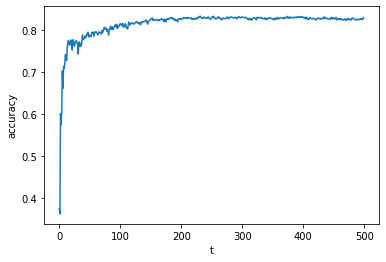

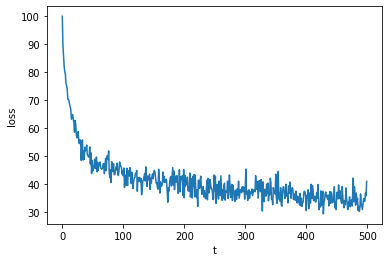

In [11]:
# When N = 1000
N = 1000
ITR = 500
lr = 2e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When datasize size=10, t=500, learning rate=2e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')

When datasize size=10000, t=1000, learning rate=2e-7, training finished in 49.907288789749146 second(s)
Final accuracy: 86.05000000000001 
Final loss: 42.32360634957506


Text(0, 0.5, 'loss')

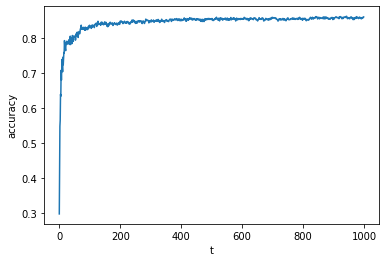

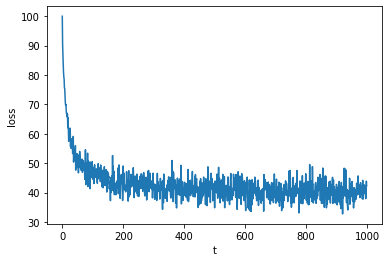

In [12]:
# When N = 10000
N = 10000
ITR = 1000
lr = 2e-7
start_time = time.time()
W_Final, loss, acc_W = SGD(W0, train_image, y_oh, B, N, ITR, lr)
end_time = time.time()
print('When datasize size=10000, t=1000, learning rate=2e-7, training finished in', (end_time-start_time),'second(s)')
print('Final accuracy:',acc_W[ITR-1]*100, '\nFinal loss:', loss[ITR-1])
plt.figure()
plt.plot(acc_W)
plt.xlabel('t')
plt.ylabel('accuracy')
plt.figure()
plt.plot(loss)
plt.xlabel('t')
plt.ylabel('loss')